In [240]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [241]:
surgical = pd.read_csv(r'C:\Users\surfacepro\.ipython\surgical.csv')


In [242]:
surgical.keys()

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

In [243]:
surgical.shape

(14635, 25)

In [244]:
surgical.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [245]:
df=surgical.drop(['complication'], axis='columns')

In [246]:
from sklearn.preprocessing import StandardScaler
#Scaling the data so that the mean and variance are between 0-1
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)


In [247]:
#Explained variance of 98%
pca = PCA(n_components = 0.98)
pca.fit(scaled)
x_pca = pca.transform(scaled)

In [248]:
x_pca = pca.transform(scaled)
#vieiwing the shape of data before PCA and after PCA
print(scaled.shape)
print(x_pca.shape)


(14635, 24)
(14635, 22)


Text(0, 0.5, 'Second Principal Component')

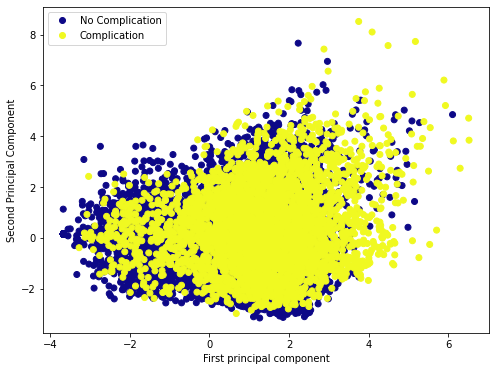

In [249]:
#Plotting the first and second component
plt.figure(figsize=(8,6))
classes= ["No Complication", "Complication"]
scatter=plt.scatter(x_pca[:,0], x_pca[:,1], c=surgical['complication'], cmap='plasma', )
plt.legend(handles=scatter.legend_elements()[0],labels=classes, loc='upper left')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [250]:
pca.components_


array([[ 2.18875947e-03, -3.30897408e-01, -1.61982113e-01,
         1.77788807e-01,  1.74329858e-01, -2.33544337e-01,
         1.91671225e-02,  4.77693825e-02,  8.67737800e-02,
        -3.84274322e-01,  5.94593413e-02,  6.86262503e-02,
         2.78562727e-01,  2.24810367e-01,  1.33943467e-01,
         3.33402480e-01,  2.35131478e-01, -1.97649188e-01,
         1.19141854e-01, -1.47923790e-01,  2.22329446e-01,
         4.51269112e-02,  3.75658509e-01, -3.71637398e-02],
       [ 2.14319840e-01,  2.34980886e-01,  4.60382489e-01,
         2.54238193e-01,  4.29331498e-01,  3.52535611e-01,
         6.96598828e-02,  3.28032851e-01,  1.21582749e-01,
         2.95732649e-02, -4.47683382e-03,  1.57753687e-01,
        -1.30168838e-01,  1.97987009e-01,  2.21621273e-01,
         9.45934755e-02, -2.25182335e-02,  9.57284500e-02,
         4.90307819e-02,  3.08977914e-02, -2.97421565e-02,
         1.38237094e-01,  1.04950413e-01, -4.88739888e-02],
       [-4.30953887e-01,  1.46305880e-01, -2.97077167e

[0.20435168 0.28858952 0.36653912 0.4335158  0.47882208 0.52217886
 0.56449776 0.60505312 0.64514327 0.68264815 0.71943715 0.75532322
 0.7903337  0.82162028 0.85145508 0.88055409 0.90822655 0.93196401
 0.95078563 0.96416313 0.97715845 0.98687736]


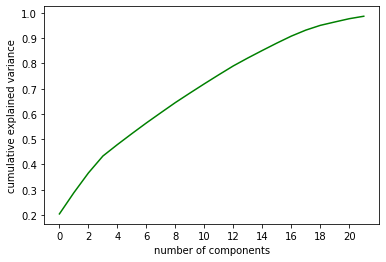

In [254]:

plt.plot(np.cumsum(pca.explained_variance_ratio_), 'g')
plt.xticks(np.arange(0, 22, step=2))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print (pca.explained_variance_ratio_.cumsum())


[0.20435168 0.08423783 0.0779496  0.06697668 0.04530628 0.04335678
 0.0423189  0.04055536 0.04009015 0.03750488 0.036789   0.03588607
 0.03501048 0.03128659 0.0298348  0.02909901 0.02767246 0.02373746
 0.01882162 0.01337751 0.01299532 0.00971891]


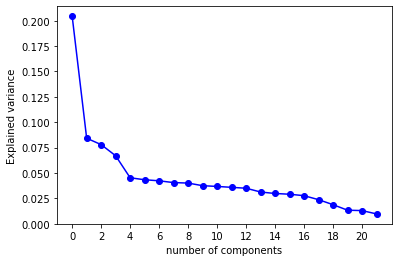

In [255]:
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.xticks(np.arange(0, 22, step=2))
plt.xlabel('number of components')
plt.ylabel('Explained variance');
print (pca.explained_variance_ratio_)

In [219]:
#Looking for PCs with an eignanvalue greater than one
print(pca.explained_variance_)

[4.90477549 2.02184618 1.87091834 1.6075502  1.08742509 1.0406338
 1.0157229  0.97339525 0.96222926 0.9001787  0.88299629 0.86132458
 0.84030882 0.75092935 0.71608414 0.69842402 0.66418431 0.56973791
 0.45174973 0.32108212 0.31190892 0.23326979]


In [221]:
pca =PCA(n_components= 7)
pca.fit(scaled)
x_pca = pca.transform(scaled)

In [222]:
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=df.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
bmi,0.002173,0.213769,-0.430549,0.235484,0.085817,-0.082734,-0.102450
Age,-0.330899,0.235033,0.145971,-0.135740,0.020120,0.057871,0.072654
asa_status,-0.161968,0.460845,-0.030140,0.008333,0.172036,0.052906,0.076268
baseline_cancer,0.177787,0.254142,0.020751,-0.425560,-0.317535,0.034524,-0.027120
baseline_charlson,0.174330,0.429397,-0.040904,-0.313059,-0.201258,0.034319,-0.067367
baseline_cvd,-0.233558,0.352238,-0.098085,-0.020149,0.008930,-0.034730,0.029793
baseline_dementia,0.019163,0.069612,0.039199,0.005460,0.154994,-0.243090,0.869366
baseline_diabetes,0.047777,0.328189,-0.275225,0.062617,-0.115342,-0.266994,-0.038209
baseline_digestive,0.086774,0.121660,-0.179360,0.244601,-0.165878,0.337869,0.082472
baseline_osteoart,-0.384275,0.029592,0.020459,0.118918,-0.005693,0.038520,-0.012790


#### The first component has strong loadings from morality_rsi and complication_rsi. 
#### The second component strongest loadings are from baseline_charlson and asa_status